# Kernel Perceptron
Using kernels in perceptrons is an advanced technique that extends the capabilities of traditional linear perceptrons by allowing them to handle non-linearly separable data. In many real-world problems, the data is not linearly separable. To address this, we can use the kernel trick to transform the data into a higher-dimensional space where it becomes linearly separable. This is where the concept of kernels comes into play.

A **kernel perceptron** is an extension of the classical **perceptron algorithm**, which is used in machine learning for binary classification tasks. The kernel perceptron applies the **kernel trick**, allowing it to handle non-linearly separable data by implicitly mapping the input data into a higher-dimensional space without explicitly computing the mapping.

Here's how it works:

### 1. **Perceptron Basics:**
   - A **perceptron** is a simple linear classifier that tries to find a hyperplane separating two classes. It works well when the data is linearly separable (i.e., can be separated by a straight line in two dimensions, or a hyperplane in higher dimensions).
   - For non-linearly separable data, the perceptron struggles because it can’t find a linear boundary.

### What is a kernel?
A kernel is a function that maps the input data to a higher dimensional space. It allows us to solve non linear real-world problems.



### 2. **Kernel Trick:**
   The kernel trick surpasses the otherwise necessary matrix transformation of the whole dataset by only considering the relations between all pairs of data points. 
   Common kernels include the **linear kernel** **polynomial kernel** and the **radial basis function (RBF)** kernel.

### 3. **Kernel Perceptron Algorithm:**
   - In the **kernel perceptron**, instead of using a simple linear decision rule, the algorithm computes the decision boundary based on the kernel function. This allows it to classify data that is not linearly separable in the original feature space but can be separated in a transformed feature space.

Common kernels are:
- Linear Kernel: $$ K(\mathbf{x}_1,\mathbf{x}_2) = \mathbf{x}_1.\mathbf{x}_2 = \mathbf{x}^T\cdot \mathbf{x} $$
- Polynomial Kernel: $$ K(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1 \cdot \mathbf{x}_2 + c)^d = (\mathbf{x}^T \cdot \mathbf{x} + c)^d $$
- Gaussian Radial Basis Function (RBF): $$ K(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\gamma \cdot \|\mathbf{x}_1 - \mathbf{x}_2\|^2\right) $$

### 4. **Implementation**

### Importing Needed Libraries

In [1]:
import numpy as np


### Linear Kernel
The linear kernel is the simplest form of a kernel function and is often used when the data is linearly separable. It simply computes the dot product between two vectors, meaning it does not transform the data into a higher-dimensional space.

Code:

In [2]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

### Polynomial Kernel
The polynomial kernel is a popular kernel function used in machine learning, particularly in support vector machines (SVMs) and kernelized perceptrons. The polynomial kernel allows the algorithm to fit more complex, non-linear decision boundaries.
$$
K(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1 \cdot \mathbf{x}_2 + c)^d
$$

In the **polynomial kernel** used in machine learning, the parameters **`degree`** and **`coef0`** control the complexity and flexibility of the kernel. Here's what they represent:

### 1. **Degree** (`degree`):
   - The **`degree`** parameter refers to the degree of the polynomial function used in the kernel.
   - It determines the **order of the polynomial** and, consequently, the complexity of the decision boundary.
   - The formula for the polynomial kernel is:
     $$ K(x_1, x_2) = (x_1 \cdot x_2 + \text{coef0})^{\text{degree}} $$
     where $ \mathbf{x}_1 \cdot \mathbf{x}_2 $ is the dot product of the vectors $\mathbf{x}_1$ and $\mathbf{x}_2$, and **`coef0`** is an additional constant.

### 2. **Coef0** (`coef0`):
   - The **`coef0`** parameter is a constant that controls the influence of higher-order terms in the polynomial.
   - It adds flexibility by adjusting the influence of the dot product between the input vectors before applying the polynomial function.
   - A **larger value of `coef0`** makes the kernel behave more like a **linear kernel** (since the dot product becomes less dominant compared to `coef0`), while a **smaller value of `coef0`** emphasizes the non-linear part of the polynomial function.

Code:

In [3]:
def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

### Gaussian RBF
To implement the Gaussian Radial Basis Function (RBF) kernel, also known as the Gaussian kernel, you can add the following function to the KernelPerceptron class:

Gaussian RBF Kernel Function
The Gaussian RBF kernel is defined as:

$$ K(\mathbf{x}, \mathbf{x}) = \exp\left(-\gamma \cdot \|\mathbf{x}_1 - \mathbf{x}_2\|^2\right) $$
where $\gamma$ controls the spread of the influence of a single training example on the decision boundary.



A **Gaussian** function is a function that takes the form of         $ f(x) = \exp\left(-x^2\right) $
The **Radial Basis Function** is a real valued function that depends on the distance between
the input and a reference point.
$$ \gamma(\mathbf{x}) = \hat{\gamma}(||\mathbf{x}-\mathbf{c}||)

In matrix form:

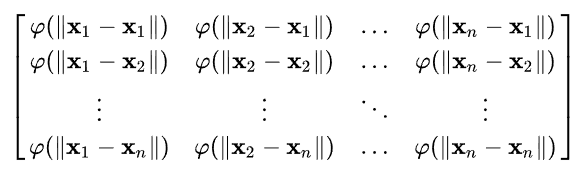

Code:

In [4]:
def rbf_kernel(x1, x2, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

Code:

### 5. **Kernel Perceptron Implementation**

### Explanation of the Code:
1. **Initialization** (`__init__`):
   - `kernel`: The kernel function to be used (default is the `linear_kernel`).
   - `max_iter`: Maximum number of iterations the perceptron will run during training.
   - `eta` : Learning rate for the weights.
   - `kernel_params`: Any additional parameters for the kernel function are passed using `**kernel_params`.

2. **Training the Model** (`fit`):
   - Initializes the `alpha` values, which represent the importance of each data point in determining the decision boundary.
   - The training process loops over the data for the specified number of iterations (`max_iter`). During each iteration, it predicts the label of each sample and updates the corresponding `alpha` if misclassified.

3. **Making Predictions** (`predict`):
   - Uses the trained `alpha` values and the kernel function to predict the label of new samples by comparing the similarity between the new samples and the support vectors (i.e., the training data).
   - Returns an array of predictions for all test points.

This kernel perceptron implementation allows for flexibility in using different kernels by passing them as functions, such as `linear_kernel`, `polynomial_kernel`, or `rbf_kernel`, with additional parameters.

In [5]:
# Kernel Perceptron Class
class KernelPerceptron:
    def __init__(self, kernel=linear_kernel, max_iter=100, eta = 1.0, **kernel_params):
        # Initialize the kernel function (default is linear kernel)
        self.kernel = kernel
        # Set the maximum number of iterations for the learning process
        self.max_iter = max_iter
        # Store any additional kernel parameters passed
        self.kernel_params = kernel_params
        # Coefficient for learning rate
        self.eta = eta

    def fit(self, X, y):
        # Initialize alpha (the weight of support vectors) to zeros
        self.alpha = np.zeros(len(X))
        # Store the training data (features and labels)
        self.X_train = X
        self.y_train = y
        
        # Perceptron learning loop (runs for the specified number of iterations)
        for _ in range(self.max_iter):
            # Loop over all training data points
            for i in range(len(X)):
                # Calculate the prediction for the current sample using the kernel function
                # It sums over all support vectors, weighted by alpha, kernel similarity, and label
                prediction = np.sign(np.sum([self.alpha[j] * y[j] * self.kernel(X[i], X[j], **self.kernel_params) 
                                             for j in range(len(X))]))
                
                # If the prediction is incorrect (i.e., misclassified), update alpha for the current sample
                if prediction != y[i]:
                    self.alpha[i] += self.eta  # Increment alpha for the misclassified sample

    def predict(self, X):
        # Predict the labels for new data points
        y_pred = []
        # Loop over the test data points
        for x in X:
            # Calculate the prediction by summing over the support vectors
            prediction = np.sign(np.sum([self.alpha[i] * self.y_train[i] * self.kernel(x, self.X_train[i], **self.kernel_params)
                                         for i in range(len(self.X_train))]))
            # Append the prediction to the list of predictions
            y_pred.append(prediction)
        # Return the predictions as a numpy array
        return np.array(y_pred)


### 6. **Testing the functionality**

We generate a simple dataset and test the code in order to make sure of the functionality of our implementation.

In [33]:
# Simple dataset
X = np.array([[2, 3], [1, 1], [2, 0.5], [0.5, 1], [1, 0], [1.5, 1]])
y = np.array([1, -1, 1, -1, 1, -1])  # Labels

We now initialize our model and try every kernel to see if it works properly.

In [34]:
# Train the Kernel Perceptron
perceptron = KernelPerceptron(max_iter=10000,kernel=linear_kernel,eta=0.5)
perceptron.fit(X, y)
# Predict on the training data
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [-1. -1. -1. -1. -1. -1.]


In [29]:
# Train the Kernel Perceptron
perceptron = KernelPerceptron(max_iter=1000,kernel=polynomial_kernel)
perceptron.fit(X, y)
# Predict on the training data
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [ 1. -1.  1. -1.  1. -1.]


In [30]:
# Train the Kernel Perceptron
perceptron = KernelPerceptron(max_iter=1000,kernel=rbf_kernel)
perceptron.fit(X, y)
# Predict on the training data
predictions = perceptron.predict(X)
print("Predictions:", predictions)

Predictions: [ 1. -1.  1. -1.  1. -1.]


### 6. **Drawbacks of Kernel Perceptron**
1. **Doesn't Always Find a Solution**:
   - If the data isn't separable in the transformed space (even with the kernel), the kernel perceptron might not converge to a solution, or it may run indefinitely.

2. **Dependence on Kernel Choice**:
   - The performance is heavily influenced by the choice of the kernel and its parameters. Choosing the wrong kernel or parameters can lead to poor results. You will need domain  knowledge in order to pick the suitable kernel in order to make the model work properly, Which makes it a major drawback.

3. **Computationally Expensive**:
   - It can be slow, especially with large datasets or complex kernels, because it involves calculating distances or similarities between many pairs of data points.

4. **Memory Usage**:
   - The algorithm requires storing the entire dataset, which can be memory-intensive.

5. **Overfitting Risk**:
   - With high-degree polynomials or certain kernels, the model can become too complex and overfit the training data.